<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_14_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Assignment 14: Support Vector Machines
# Import Required Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Parkinson disease.csv to Parkinson disease (1).csv


In [8]:
# Loading the Dataset
# Loading dataset
import pandas as pd

df = pd.read_csv('Parkinson disease.csv')
df.head()

,id,gender,PPE,EEG,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [9]:
# Exploring the Dataset
# Dataset information
df.info()

# Checking missing values
df.isnull().sum()

"""No missing values - No cleaning required"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


'No missing values - No cleaning required'

In [15]:
# Separating Features and Target
# Separate features and target
X = df.drop(columns=['class'])
y = df['class']

In [16]:
# Splitting into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
# Featuring Scaling for SVM
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Building and Training the SVM Model
# Using RBF kernel good for non-linear data
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [19]:
# Making Predictions
y_pred = svm_model.predict(X_test_scaled)

In [22]:
# Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

              precision    recall  f1-score   support

           0       0.80      0.41      0.54        39
           1       0.83      0.96      0.89       113

    accuracy                           0.82       152
   macro avg       0.81      0.69      0.72       152
weighted avg       0.82      0.82      0.80       152



array([[ 16,  23],
       [  4, 109]])

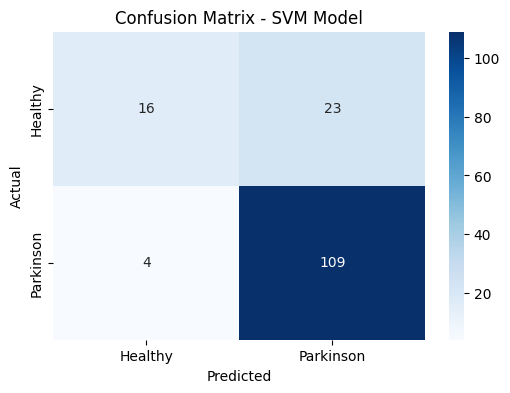

In [23]:
# Visualizing Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Parkinson'],
            yticklabels=['Healthy', 'Parkinson'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Model')
plt.show()

In [24]:
# Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [25]:
# Training Final Tuned Model
best_svm = grid.best_estimator_
best_svm.fit(X_train_scaled, y_train)

y_pred_tuned = best_svm.predict(X_test_scaled)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

Tuned Accuracy: 0.8947368421052632
              precision    recall  f1-score   support

           0       0.87      0.69      0.77        39
           1       0.90      0.96      0.93       113

    accuracy                           0.89       152
   macro avg       0.89      0.83      0.85       152
weighted avg       0.89      0.89      0.89       152

